In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
ACS =  DataLoaders.ACSData(2016,'block_group')

C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('geoid','columns',inplace =True)
C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:83: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('inc_pcincome','columns',inplace= True)
C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:92: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop(col,'columns', inplace = True)


In [4]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:198: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  self.Load()


In [5]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [6]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [7]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

C:\Users\cle9a\Documents\GitHub\rcp2\src\models\ModelClasses.py:171: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\cle9a\Documents\GitHub\rcp2\src\models\ModelClasses.py:218: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)


213144
202783
Predicting 2017:


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking:
1. Max (0.385028)
2. Median (0.154249)
3. pct_alt_heat (0.088281)
4. house_pct_live_alone (0.079518)
5. race_pct_black_or_amind (0.075907)
6. house_yr_pct_before_1960 (0.073211)
7. inc_pct_poverty (0.072736)
8. did_not_work_past_12_mo (0.071069)


In [8]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

213144
202783
Predicting 2017:
[19:57:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking:
1. Median (0.313726)
2. Max (0.212111)
3. did_not_work_past_12_mo (0.082153)
4. race_pct_black_or_amind (0.080522)
5. pct_alt_heat (0.079632)
6. house_yr_pct_before_1960 (0.078414)
7. inc_pct_poverty (0.077514)
8. house_pct_live_alone (0.075928)


In [9]:
ARC =  DataLoaders.ARCPData()

C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '_')
C:\Users\cle9a\Documents\GitHub\rcp2\src\data\DataLoaders.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '_')


In [10]:
ARC.data

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [11]:
SVI =  DataLoaders.SVIData(ACS.data)
SVI.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [12]:
Smoke = SmokeAlarmModels()

-----Training_Performance------
58.119761760331286
Test RMSE: 7.62363179595731
Test MAE: 5.521708103061582


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


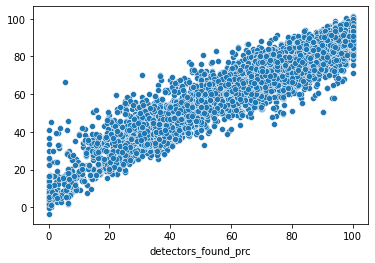

-----Test Performance ----- 
Test RMSE: 10.392913715822553
Test MAE: 7.310877691932978


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


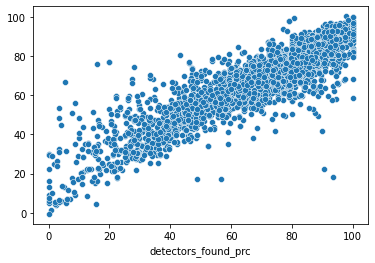

Test Correlation: (0.8837799716190101, 0.0)
Test R-squared: 0.7742772115991976

 Feature ranking:
1. county_detectors_found_prc (0.415982)
2. state_detectors_found_prc (0.221323)
3. RPL_THEME1 (0.092098)
4. RPL_THEME3 (0.072810)
5. RPL_THEME2 (0.071247)
6. RPL_THEME4 (0.059127)
7. Population Density (per square mile), 2010 (0.053856)
8. inc_pct_poverty (0.013557)


In [13]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS,SVI, ACS_cols_to_use,svi_use, utils.DATA['data'])

In [14]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns

In [15]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]

In [16]:
out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,0]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,0]


In [17]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [18]:
out['smoke_detector_risk_score'] =  1 - out['detectors_predicted'] / 100

In [19]:
out['CombinedRiskScore'] = ( max(out['fire_severity_risk_score'] 
                          + out['fire_propensity_risk_score']) 
                          + out['smoke_detector_risk_score']
                            ) * 100       

In [21]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,fire_propensity_risk_score,fire_severity_risk_score,recorded_home_visits,detectors_working_prc,detectors_working_CI,geography,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_score,CombinedRiskScore
GEOID,,,,,,,,,,,,,,,,,,,
#_010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0.622548,0.506302,0.0,31.38,1.089020,state,504.8,21.858675,0.781413,278.093109
#_010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0.966579,0.824059,0.0,31.38,1.089020,state,504.8,23.524992,0.764750,276.426758
#_010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0.740453,0.082554,0.0,31.38,1.089020,state,1682.5,9.120106,0.908799,290.831665
#_010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0.853479,0.805192,0.0,31.38,1.089020,state,1682.5,8.935228,0.910648,291.016541
#_010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0.994841,0.996304,0.0,31.38,1.089020,state,1633.1,9.486031,0.905140,290.465729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#_560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0.652114,0.248441,0.0,38.90,3.199404,state,1.4,70.594833,0.294052,229.356934
#_560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0.592363,0.505123,0.0,38.90,3.199404,state,1.4,71.463287,0.285367,228.488495
#_560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,0.918188,0.485757,3.0,38.90,3.199404,state,91.0,73.112038,0.268880,226.839737


In [20]:
out.index = '#_' + out.index
out.to_csv(utils.DATA['model-outputs'] / 'CombinedModels.csv')

In [ ]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100